# Plots for the 2MDM analysis

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from auxPlots import columnsDict,defaultPars
import itertools
from scipy.interpolate import griddata

pd.option_context('display.max_columns', None)
pd.option_context('display.max_rows', None)

plt.rcParams.update(defaultPars)

pd.options.mode.chained_assignment = None #Disable copy warnings

cm = plt.colormaps['RdYlBu']

#### Get data in pcl format and print all columns names

In [3]:
#Merge with SModelS DataFrame
pclFiles = ['../data/smodels_results.pcl']
dfs = [pd.read_pickle(i) for i in pclFiles]
dataDF = pd.concat(dfs, ignore_index=True)
dataDF.rename(columns=columnsDict,inplace=True)
dropCols = [c for c in dataDF.columns if ('Output' in c or 'weight' in c)]
dataDF.drop(columns=dropCols,inplace=True)
dataDF.set_index('filename',drop=True,inplace=True)
print(dataDF.columns.values.tolist()) #Print all columns names

['mChi', 'mS', 'mZp', 'mass.9000002', 'mass.9000003', 'mass.9000004', 'mass.9000005', 'width.9000002', 'width.9000003', 'width.9000004', 'width.9000005', 'width.9000006', 'width.9900026', 'width.9900032', 'gchi', 'gq', 'sina', 'extpar.4', 'xsec8TeV(fb).9900032', 'xsec8TeV(fb).9900026', 'xsec13TeV(fb).9900032', 'xsec13TeV(fb).9900026', 'BRs.sd.W-,W+', 'BRs.sd.higgs,higgs', 'BRs.sd.Z,Z', 'BRs.sd.t-,t+', 'BRs.sd.chi,chi', 'BRs.sd.ta+,ta-', 'BRs.zp.chi,chi', 'BRs.zp.c,c', 'BRs.zp.q,q', 'BRs.zp.b,b', 'BRs.zp.t-,t+', 'totalxsec13TeV(fb)', 'totalxsec8TeV(fb)', 'CombinedRes', 'Total xsec for missing topologies (fb)', 'Total xsec for missing topologies with displaced decays (fb)', 'Total xsec for missing topologies with prompt decays (fb)', 'Total xsec for topologies outside the grid (fb)', 'ExptRes.result0.maxcond', 'ExptRes.result0.theory prediction (fb)', 'ExptRes.result0.upper limit (fb)', 'ExptRes.result0.expected upper limit (fb)', 'ExptRes.result0.TxNames', 'ExptRes.result0.Mass (GeV)', 

### Remove results with gq = 0.25 and gchi = sqrt(2)

In [4]:
gq = 0.25
gchi = np.sqrt(2)
sina = 0.25
dataDF = dataDF[(np.abs(dataDF['gchi'] - gchi) < 0.01) & (dataDF['gq'] == gq)  & (dataDF['sina'] == sina)]

### Plot width

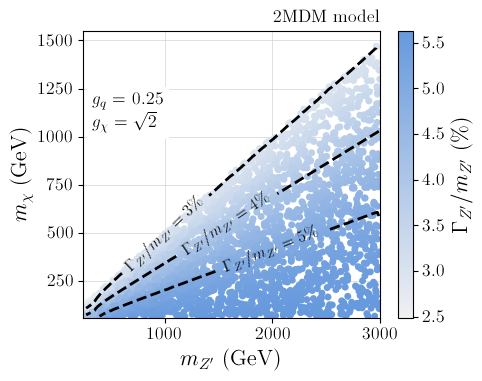

In [6]:
cm = sns.light_palette("#69d", as_cmap=True)


x = dataDF['mZp']
y = dataDF['mChi']
ratioGM = 100*dataDF['width.9900032']/x


sc = plt.scatter(x, y, c=ratioGM, cmap=cm)
cb = plt.colorbar()
cb.set_label(label=r'$\Gamma_{Z^{\prime}}/m_{Z^{\prime}}$ (\%)')


pts = np.array(list(itertools.product(np.linspace(200.,4100.,300),np.linspace(0.,2000.,300))))
rPts = griddata(list(zip(x,y)),ratioGM,pts)
pts = pts[~np.isnan(rPts)]
rPts = rPts[~np.isnan(rPts)]
cs = plt.tricontour(pts[:,0],pts[:,1],rPts,levels=[3.0, 4.0,5.0], colors='black', linestyles='dashed')

plt.clabel(cs, inline=True, fontsize=12,fmt={
                                            #  5.0 : r"$\mathbf{\Gamma_{Z^\prime}/m_{Z^\prime} = 5\%}$  ", 
                                            #  4.0 : r"$\mathbf{\Gamma_{Z^\prime}/m_{Z^\prime} = 4\%}$",
                                            #  3.0 : r"$\mathbf{\Gamma_{Z^\prime}/m_{Z^\prime} = 3\%}$",},
                                             5.0 : r"$\Gamma_{Z^\prime}/m_{Z^\prime} = 5\%$  ", 
                                             4.0 : r"$\Gamma_{Z^\prime}/m_{Z^\prime} = 4\%$",
                                             3.0 : r"$\Gamma_{Z^\prime}/m_{Z^\prime} = 3\%$",},
                                             inline_spacing = 7,
                                             manual= [(1000.,495.),(1500.,600.),(2000.,400.)])

textstr = '\n'.join((
    r'$g_q =$ %1.2f' %gq, 
    r'$g_{\chi} = \sqrt{2}$'))

plt.text(0.03,0.66,textstr,
         bbox=dict(facecolor='white', edgecolor='none'),
         transform = plt.gca().transAxes)

plt.title(r'2MDM model', loc='right')

plt.ylim(60, 1550) 
plt.xlim(240, 3000)
plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')

plt.tight_layout()
plt.savefig('./figures/2mdm_ratio_wm.png')
plt.show()